# Exp11

## wanderer2_4agents
- 4 agents and 1 goal landmark
    - the same as Exp 10 except that the number of agnets is 2 -> 4.
    
    
### In the following, I made experiments with different parameter set.
A parameter of "PENALTY_WEIGHT" controls heaviness of the penalty   
for the consumption of the energy. The results are described as follow.

## The parameter set
### wander2_4agents-1 
 (penalty_weight=0.0, penalty_weight2=0.0)
 
### wander2_4agents-2 
 (penalty_weight=0.01, penalty_weight2=0.0)
 
### wander2_4agents-3 
 (penalty_weight=0.01, penalty_weight2=0.001)
 
### wander2_4agents-4 
 (penalty_weight=0.01, penalty_weight2=0.003)

### wander2_4agents-5 
 (penalty_weight=0.01, penalty_weight2=0.01)

### wander2_4agents-6 
(penalty_weight=0.01, penalty_weight2=0.03)


## summary
As in the case of Exp10, trained agents are roughly divided into three groups (roles):
- **independent**: agent, which mostly uses the energy and doesn't see the other agents' positions
- **follower**: agent, which mostly uses the attention and follows the other agents.
- **hybrid**: agent, which uses but saves the energy by (sometimes) following the other agents.

The agents' behavior diverge, except for "wander2_4agents-6" whose penalty is very high.  
The diversity is much larger than that of "Exp10". One of the reason is that "follower" can get   
good rewards in this 4-agents game so that "follower" emerges in many cases  
(even in the case of PENALTY_WIEGHT=PENALTY_WEIGHT2).

**The results suggest that the number of agents is essential for the diversity.**
Is this trivial result? I don't think so.  
The most important point is that, unlike our society, there is no difference between agents:  
their neural-net structure is the same (~ their talent is the same) and their learning processes  
are randomly decided with no bias (~ 'expected' education chance is also equal).

**The diversity is intrisically contained in the world of multi agents.**  
The evolved agent role would change by slight chance.

It is also interesting to note that the agent role rearely changes after some training.  
This is probably because there is a gap between roles so that the change of the role  
needs some cost. If the penalty is larger than the cost, the agent changes the role.
This is like our realistic world... 

Our complex society can be understood in some ways, using these simple multi agents.  
This is interesting, isn't it?

In [1]:
%matplotlib inline
import glob
import utils_note
plt.rcParams["font.size"] = 12

colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e']
linestyles = ['-', '--', ':', '-.']
    
def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return sorted(curve_dirs)

def plot_curves(ax, curve_dir, y_colns_template=None):
    show_legend = False
    each_exp_dir = curve_dir.split('/')[-2]
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_states.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    
    if y_colns_template is not None:
        agents = set([c.split('_')[0] for c in _df.columns if c.startswith('agent')])
        for i_agent, agent in enumerate(sorted(list(agents))):
            kwargs = {}
            for i, y_coln in  enumerate(y_colns_template):
                    y_coln = '%s_%s' % (agent, y_coln)
                    kwargs['linestyle'] = linestyles[i % len(linestyles)]
                    kwargs['color'] = colors[i_agent]
                    _df.plot(x='episode', y=y_coln, ax=ax, title=each_exp_dir, legend=show_legend, **kwargs)
#                     kwargs['color'] = ax.get_lines()[-1].get_color()
    else:
        _df.plot(x='episode', ax=ax, title=each_exp_dir, **kwargs)
    ax.set_ylim([-70, 1])

def plot_training(each_exp_dir, y_columns):
    curve_dir = osp.join(each_exp_dir, 'learning_curves')
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_curves(ax, curve_dir, y_columns)
    
def plot_energy(fn_video):
    fn_csvs =\
        glob.glob(fn_video.replace('.mp4', '_states_agent*.csv'))
    dfs = []
    for fn_csv in sorted(fn_csvs):
        dfs.append(pd.read_csv(fn_csv))

    fig, ax = plt.subplots(1, 1, figsize=(24, 4))
    legends = []
    for i, df_agent in enumerate(dfs):
        for j, _y in enumerate(['energy', 'attention']):
            df_agent.plot(y=_y, ax=ax, color=colors[i], ls=linestyles[j])
            legends.append('agent%d %s' % (i, _y))
    ax.legend(legends)

    # plot end-episode line
    df_ = dfs[0]
    end_epi = 0
    for epi in sorted(df_['episode'].unique()):
        end_epi +=  df_.loc[df_['episode'] == epi, 'step'].max() + 1
        ax.axvline(end_epi, color='orange', ls='--')

# 1. Learning curve (episode vs rewards) for all parameter set
The consumption of the energy and the attension is also plotted.  
There are 50 steps in the episode so that the max consumption value is -50.  

**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention

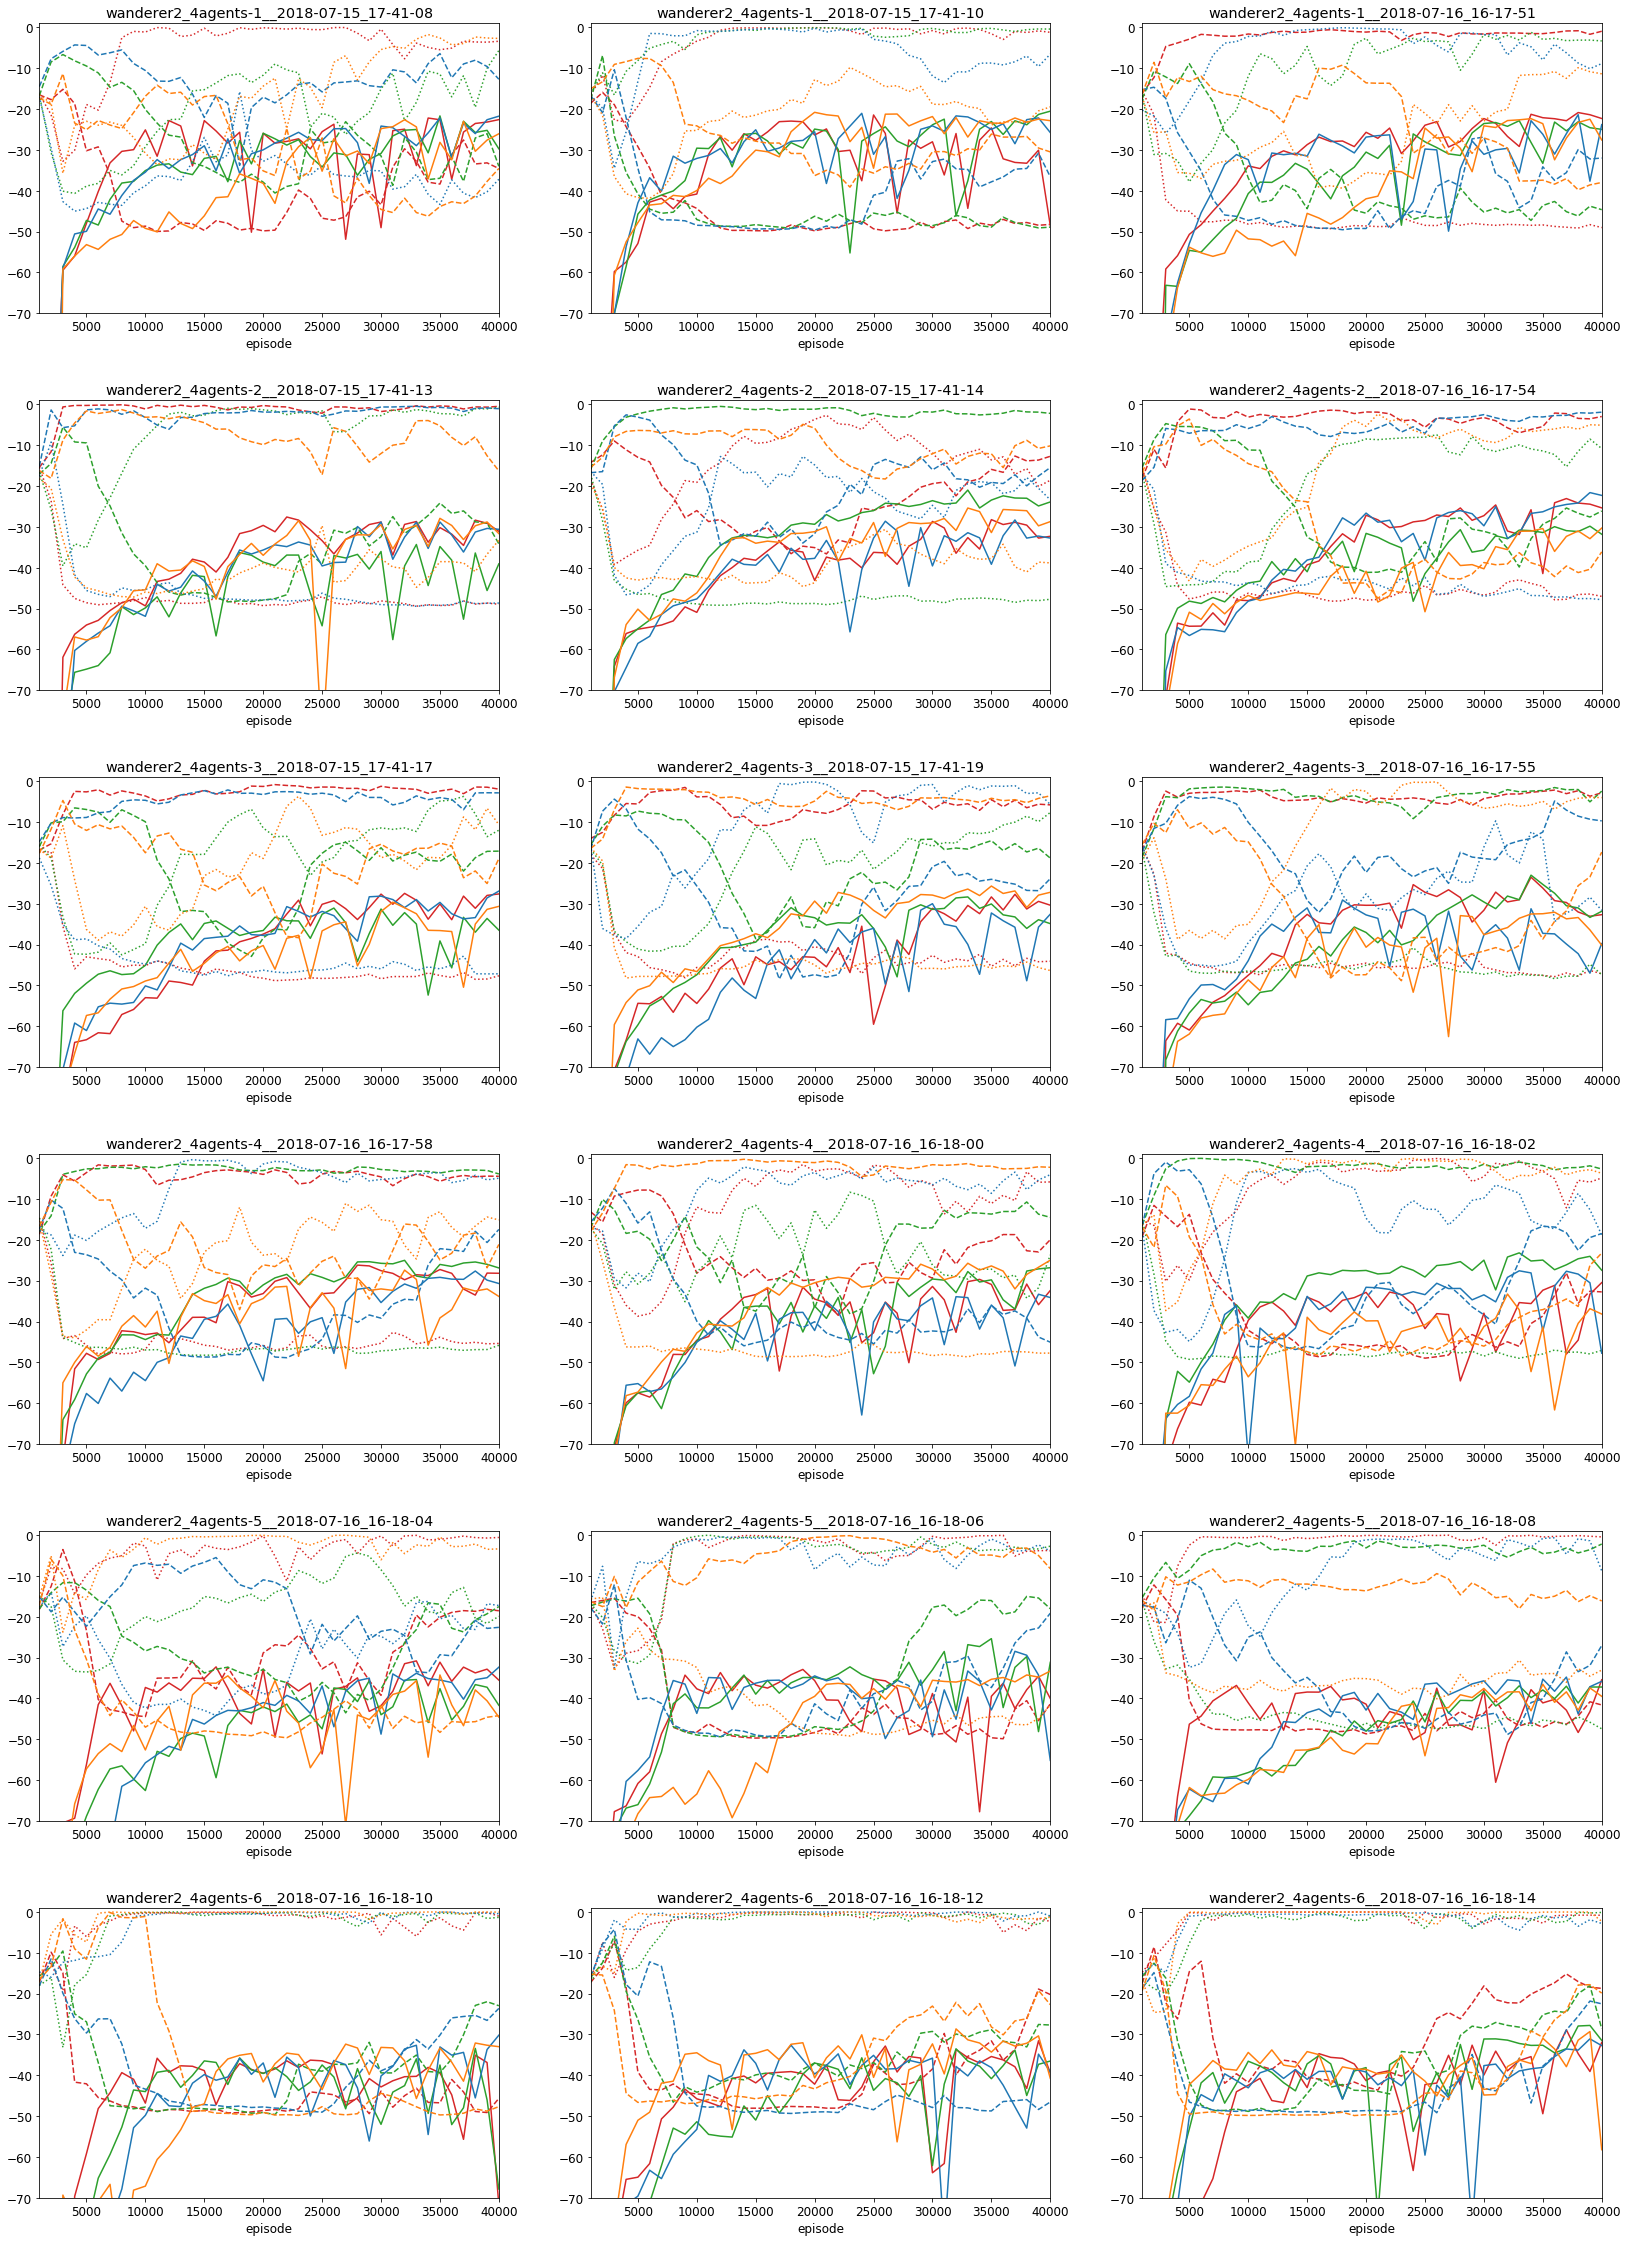

In [2]:
# print('agent0: red\nagent1: green\nagent2: blue\nagent3: orange')
# print('line: reward,  dash: energy_min,  points: attention_min')

exp_dir = '../exp_results/exp11_180716'
y_columns = ['rew', 'energy_min', 'attention_min']
fig, axes = plt.subplots(6, 3, figsize=(28, 40))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

curve_dirs = get_all_exp_curves(exp_dir)
for i, curve_dir in enumerate(curve_dirs):
    ax = axes[i]
    plot_curves(ax, curve_dir, y_columns)


In [3]:
y_columns = ['rew', 'energy_min', 'attention_min']

def show_results(exp_dir, each_exp_dir, epis):
    # training plot
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_training(each_exp_dir, y_columns)
    plt.show()

    fn_video_template = 'video-{}.mp4'
    for epi in epis:
        print('-' * 50)
        print('Episode %d' % epi)
        print('-' * 50)
        fn_video = fn_video_template.format(epi)
        display(utils_note.play_linked_video(each_exp_dir, fn_video))
        video_path = osp.join(each_exp_dir, 'videos', fn_video)
        plot_energy(video_path)
        plt.show()
    print('~o**' * 20)
    
def get_all_seed_dirs(exp_dir, game_name):
    return sorted([osp.basename(d) for d in glob.glob(exp_dir+'/%s_*' % game_name)])


# 2. Agents' behvior of the trained model
Each experiment result contains  
1. learning cuve (training log)
2. video of the trained agents' behavior
3. the corresponding log of the energy consumption 

The learning curve is the same as that of Section1.  
In the video of #2, the agents represent large colorful circles and the goal is a black point.  
The tranparent circle around the agent represents the visible range,   
which increases as the agent uses its energy.   
Here the video contains 5 episodes.  

The figure of #3 shows the corresponding log of the energy and the attention consumption  
of #2 video. The line color corresponds to the agent color of #2 video.  
There are 50 stesp in each episode so that the energy is reset at 0 (default value)   
every 50 steps. 

## 2-1. wanderer2_4agents-1
(penalty_weight=0.0, penalty_weight2=0.0)　　

### results
Interestingly, even in this no penalty case, the agents' behavior diverge:  
there are 'independent', 'hybrid', and 'follower'.  
In the world of no penalty, agnets can take many kinds of actions.  
It is interesting that even in this case, 'follower' emerges.

### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-1__2018-07-15_17-41-08"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



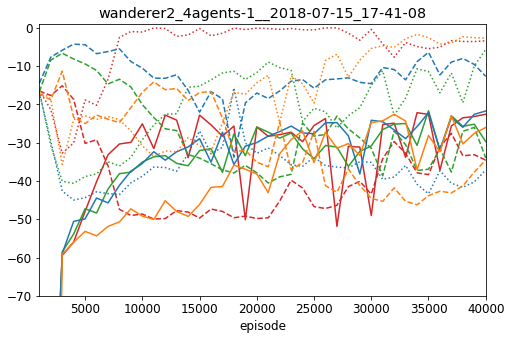

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-1__2018-07-15_17-41-08/videos/video-40000.mp4


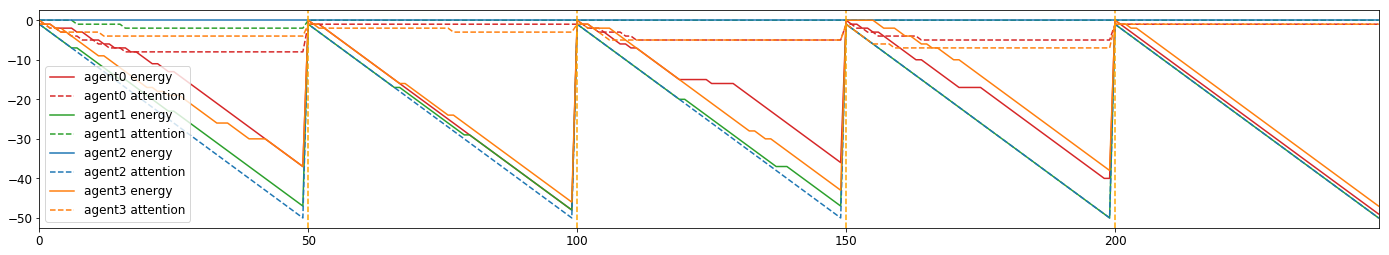

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-1__2018-07-15_17-41-10"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



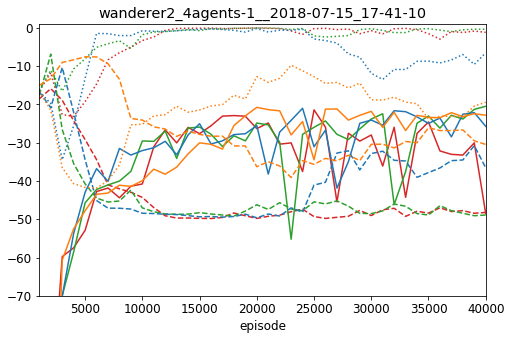

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-1__2018-07-15_17-41-10/videos/video-40000.mp4


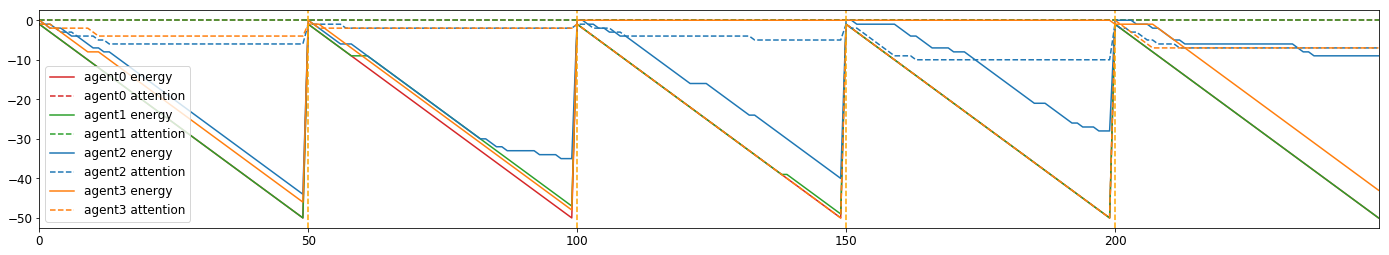

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-1__2018-07-16_16-17-51"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



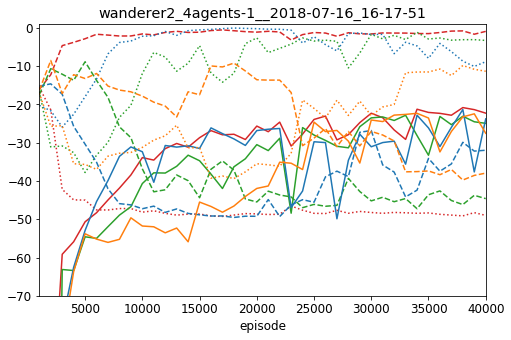

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-1__2018-07-16_16-17-51/videos/video-40000.mp4


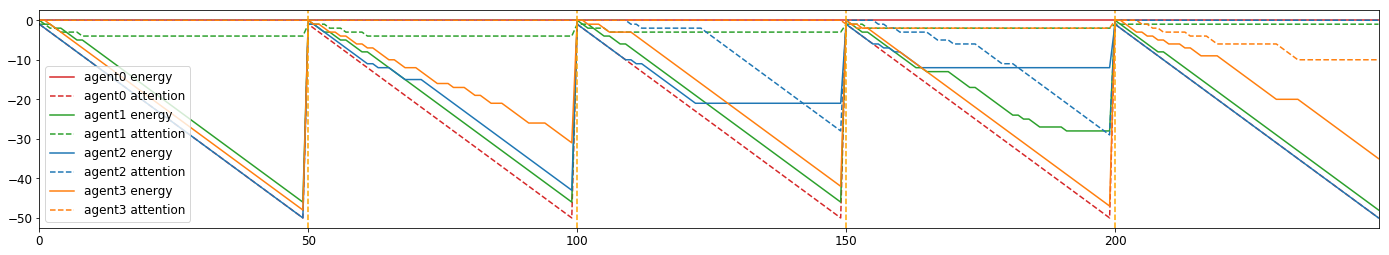

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [10]:
game_name = 'wanderer2_4agents-1'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

## 2-2. wanderer2_4agents-2
(penalty_weight=0.01, penalty_weight2=0.0)　　

### results
Two or three of four agents become followers. This is understandable  
given that there is penalty for 'energy' but no penalty for 'attention'.　　
The followees are 'independent' or 'hybrid'.

From the learning curve, first all four agents learn to use "attention".  
At some point (~3000 episodes), one or two agent(s) notice that  
using the enegy increase its reward and learn using the energy. However,  
the other agents don't change, because their reward also automatically   
increase by following the agents which use the energy.

The followers' reward is higher than that of 'independent' / 'hybrid'.  
However 'independent' / 'hybrid' cannot be 'follower', because if they  
became followers, no one would know the goal and the rewards would drop.  

This game needs at least one 'independent' / 'hybrid', but their rewards  
is lower than 'follower'. This is a dilema. It looks like our society...


### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-2__2018-07-15_17-41-13"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



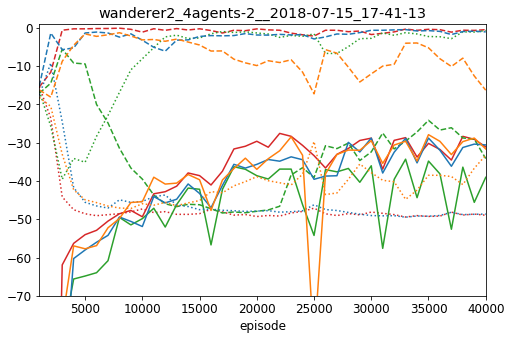

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-2__2018-07-15_17-41-13/videos/video-40000.mp4


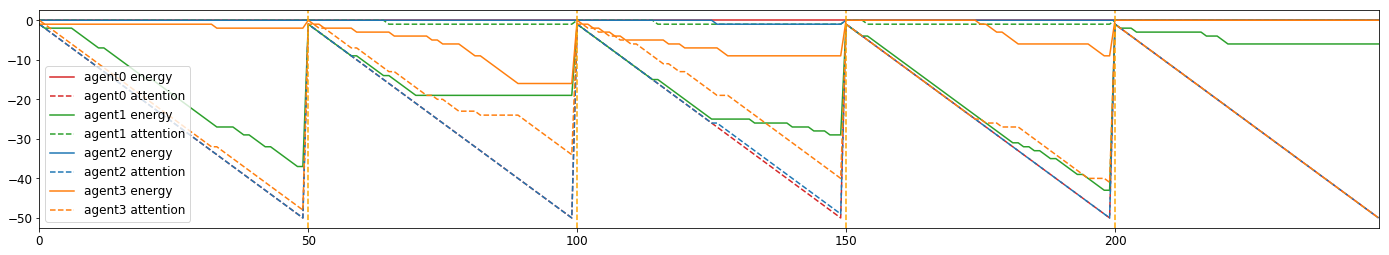

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-2__2018-07-15_17-41-14"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



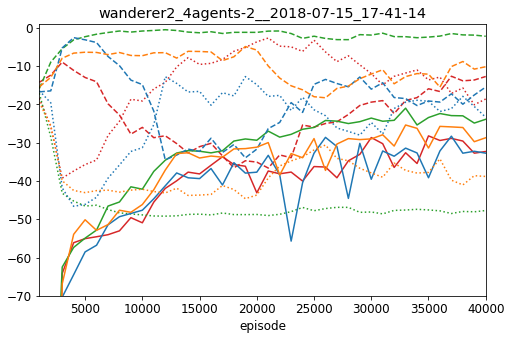

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-2__2018-07-15_17-41-14/videos/video-40000.mp4


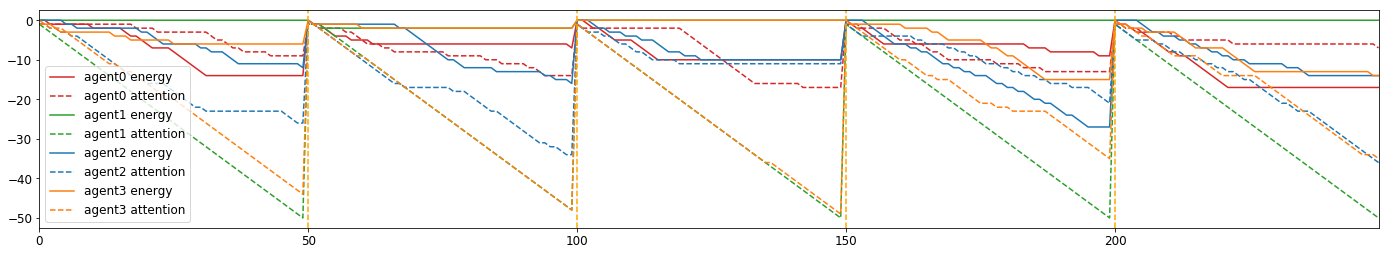

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-2__2018-07-16_16-17-54"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



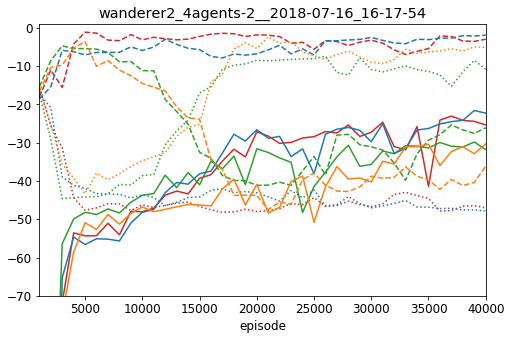

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-2__2018-07-16_16-17-54/videos/video-40000.mp4


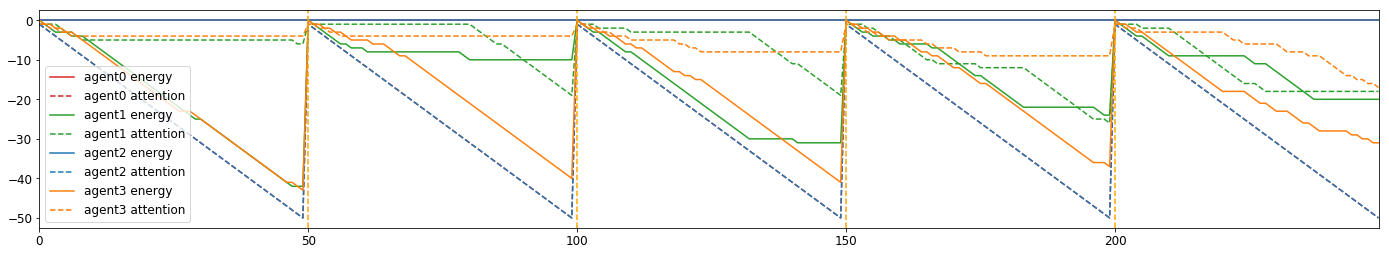

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [11]:
game_name = 'wanderer2_4agents-2'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

## 2-3. wanderer2_4agents-3
(penalty_weight=0.01, penalty_weight2=0.001)　　

### results
Almost the same resutls as 4agents-2. PENALTY_WEIGHT2 of 0.001 is   
probably so small that agents take the penalty as almost zero.

### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-3__2018-07-15_17-41-17"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



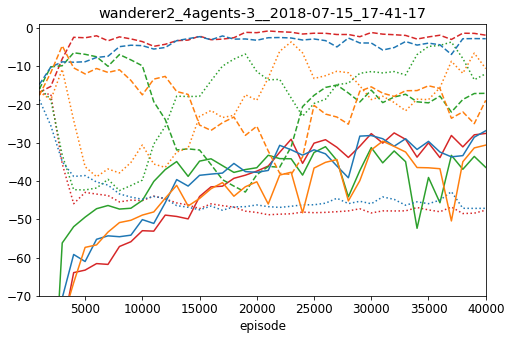

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-3__2018-07-15_17-41-17/videos/video-40000.mp4


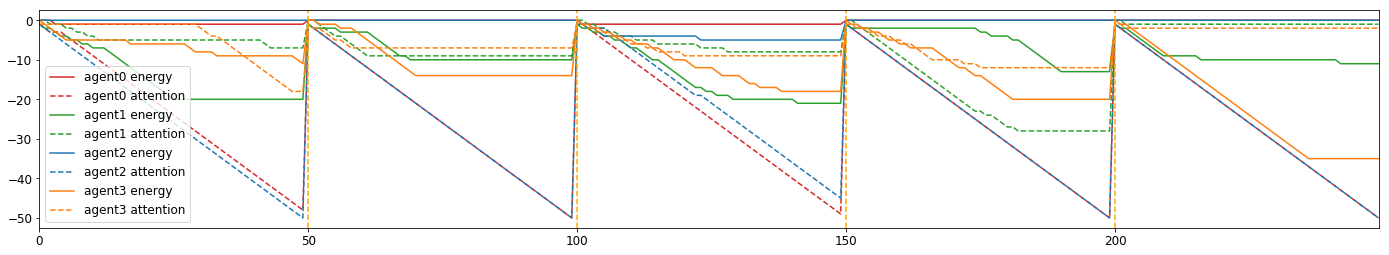

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-3__2018-07-15_17-41-19"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



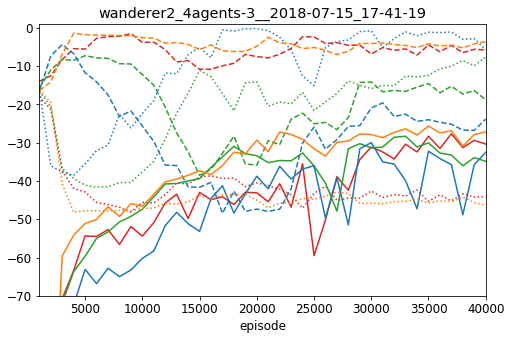

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-3__2018-07-15_17-41-19/videos/video-40000.mp4


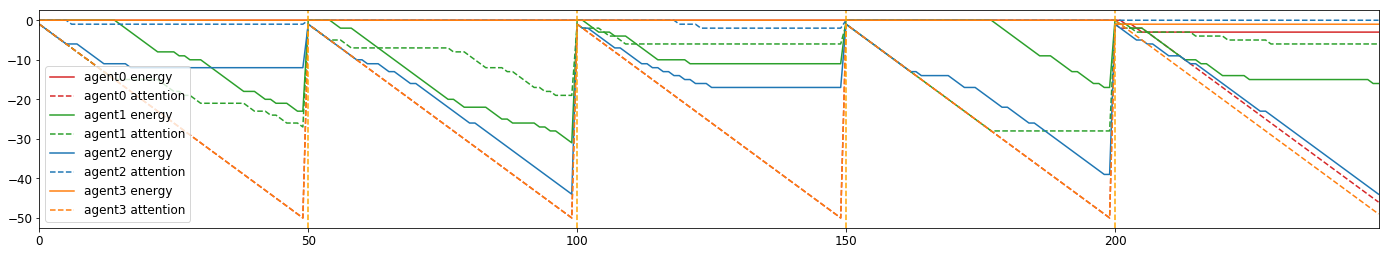

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-3__2018-07-16_16-17-55"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



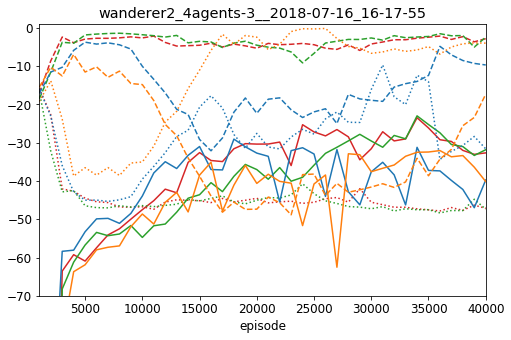

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-3__2018-07-16_16-17-55/videos/video-40000.mp4


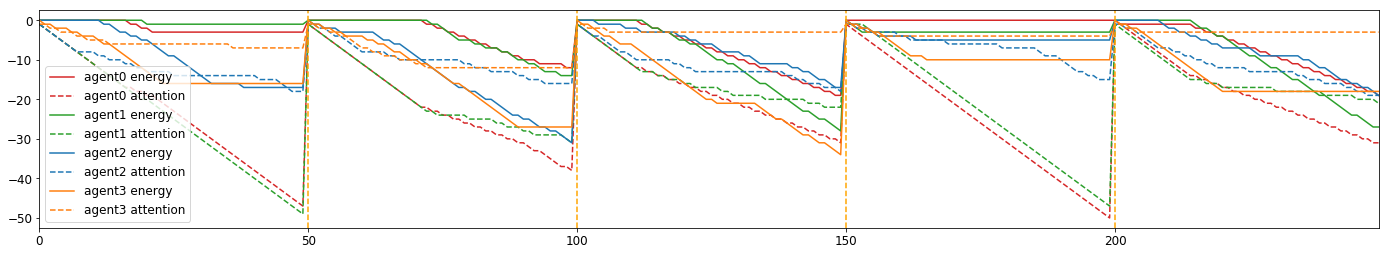

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [12]:
game_name = 'wanderer2_4agents-3'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

## 2-4. wanderer2_4agents-4
(penalty_weight=0.01, penalty_weight2=0.003)　　

### results
Almost the same resutls as "4agents-3". But compared with "4agents-3",  
the number of "hybrid" decreases. It seems that the "back and forth" policy  
gets inefficient as "PENALTY_WEIGHT2" increases. Interestingly, "follower"  
remains even in this case.

### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-4__2018-07-16_16-17-58"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

agent0: red
agent1: green
agent2: blue
agent3: orange
line: reward,  dash: energy_min,  points: attention_min


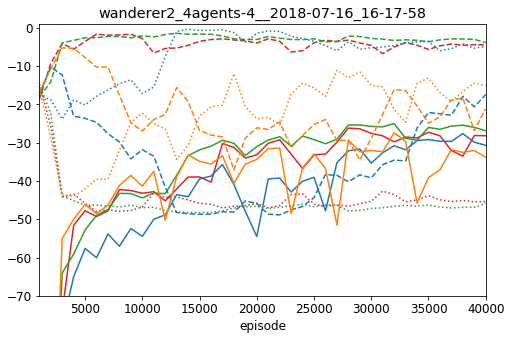

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-4__2018-07-16_16-17-58/videos/video-40000.mp4


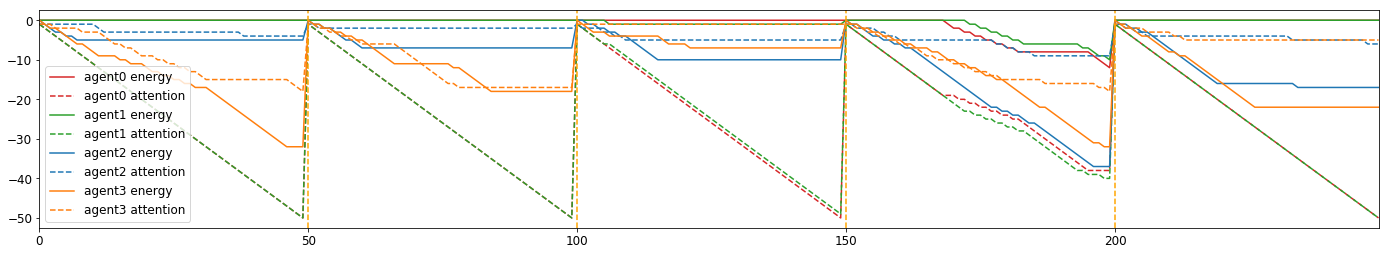

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-4__2018-07-16_16-18-00"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

agent0: red
agent1: green
agent2: blue
agent3: orange
line: reward,  dash: energy_min,  points: attention_min


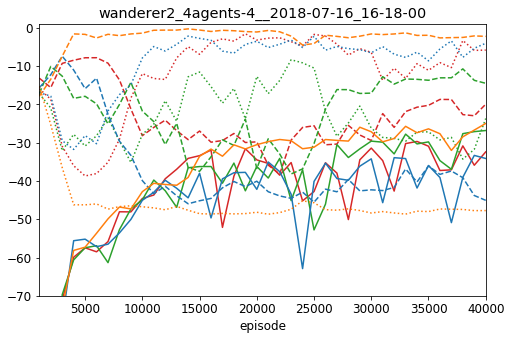

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-4__2018-07-16_16-18-00/videos/video-40000.mp4


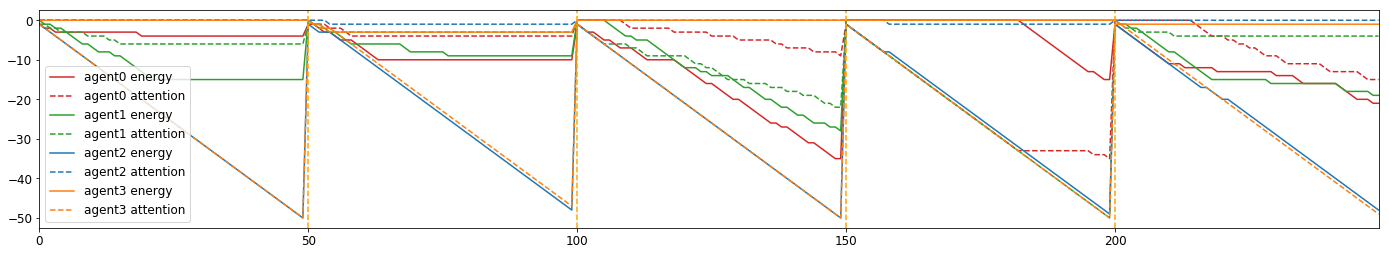

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-4__2018-07-16_16-18-02"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

agent0: red
agent1: green
agent2: blue
agent3: orange
line: reward,  dash: energy_min,  points: attention_min


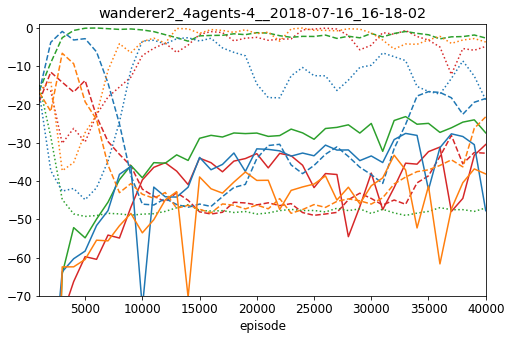

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-4__2018-07-16_16-18-02/videos/video-40000.mp4


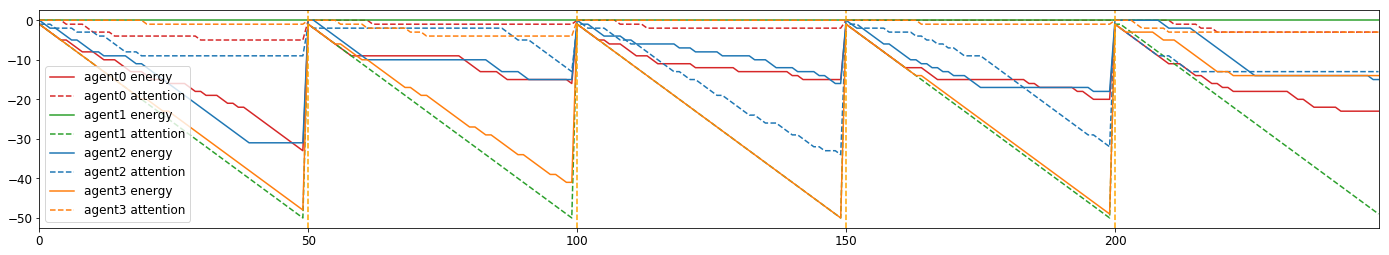

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [7]:
game_name = 'wanderer2_4agents-4'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    print('agent0: red\nagent1: green\nagent2: blue\nagent3: orange')
    print('line: reward,  dash: energy_min,  points: attention_min')
    show_results(exp_dir, each_exp_dir, epis)

## 2-5. wanderer2_4agents-5
(penalty_weight=0.01, penalty_weight2=0.01)  

### results
"PENALTY_WEIGHT2 (for attention)" and "PENALTY_WEIGHT (energy)"  
are the same value. Interestingly, even in this case, some agents become  
followers. Most of the followee are "independent". "hybrid" seems not a  
good choice in this parameter set.

This result is different from that of "wanderer2_2agents". The difference  
probably come from the number of agents. In Exp10, if one agent become  
a follower, only one agent has capability to search for the goal. In this case,  
the reward of the follower is generally smaller than that of the followee.  
Therefore no follower emeges in Exp10.

In Exp11, on the other hand, three agents can search for the goal even if  
one agent become a follower. In this case, the follower has a chance to get  
better rewards than the followees because it can see the three agents'  
positions. Actually reward of the follower in this game is not bad (not the smallest).

### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-5__2018-07-16_16-18-04"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



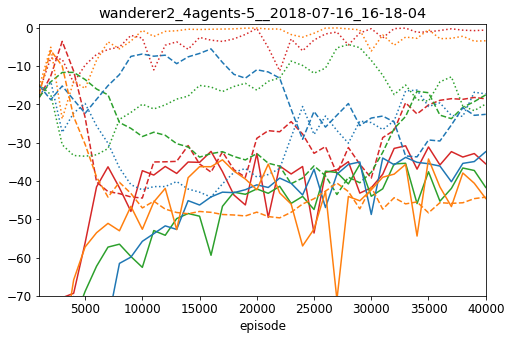

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-5__2018-07-16_16-18-04/videos/video-40000.mp4


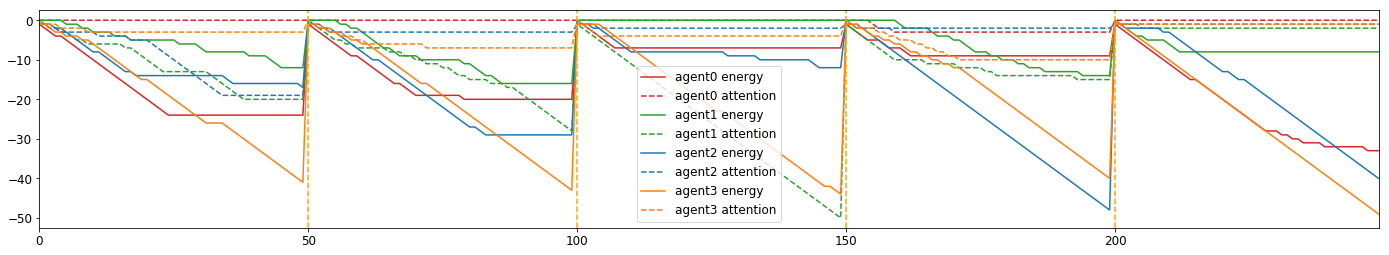

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-5__2018-07-16_16-18-06"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



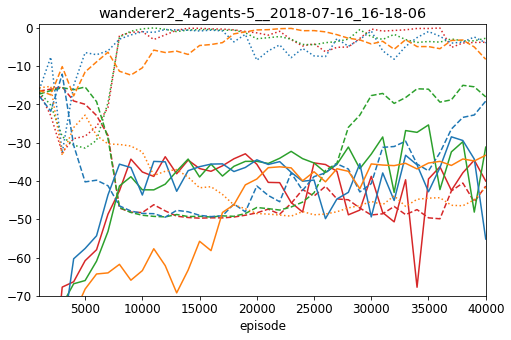

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-5__2018-07-16_16-18-06/videos/video-40000.mp4


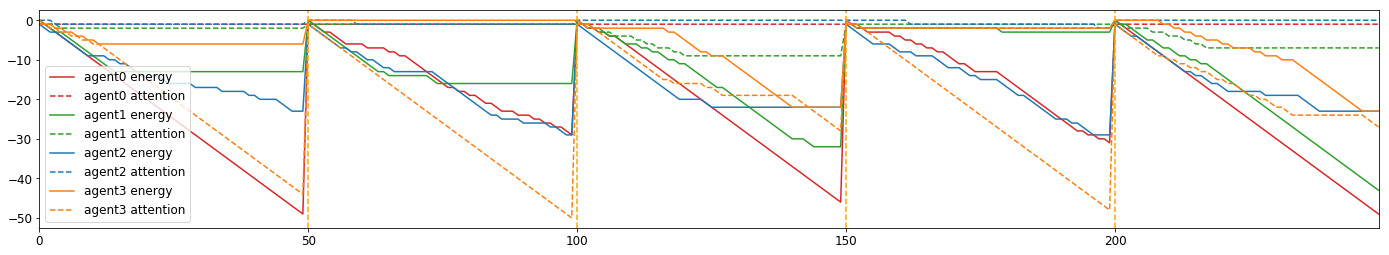

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-5__2018-07-16_16-18-08"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



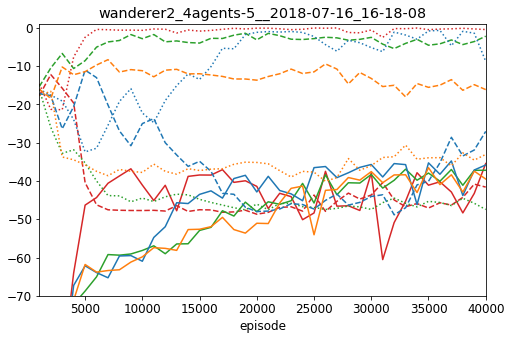

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-5__2018-07-16_16-18-08/videos/video-40000.mp4


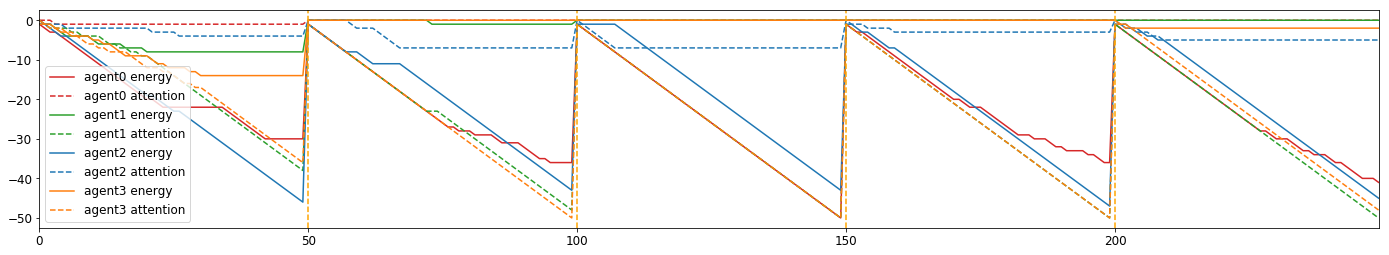

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [13]:
game_name = 'wanderer2_4agents-5'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

## 2-6. wanderer2_4agents-6
(penalty_weight=0.01, penalty_weight2=0.03)  

### results
All the agents become "independent". This is understandable  
given that "PENALTY_WEIGHT2 (for attention)" is much larger than  
"PENALTY_WEIGHT (energy)".


### plot
**agents**   
<span style="color:red">agent0</span>,
<span style="color:green">agent1</span>,
<span style="color:blue">agent2</span>,
<span style="color:orange">agent3</span>

**linestyle**
- solid(ー): reward
- dash(--): energy
- points(...): attention


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-6__2018-07-16_16-18-10"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



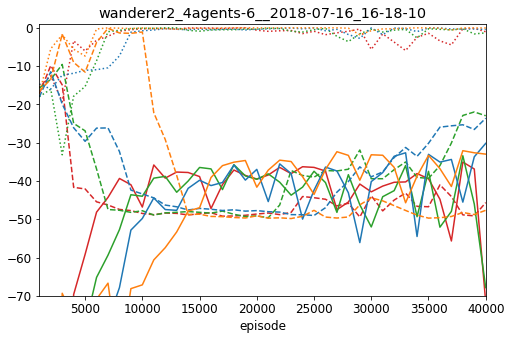

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-6__2018-07-16_16-18-10/videos/video-40000.mp4


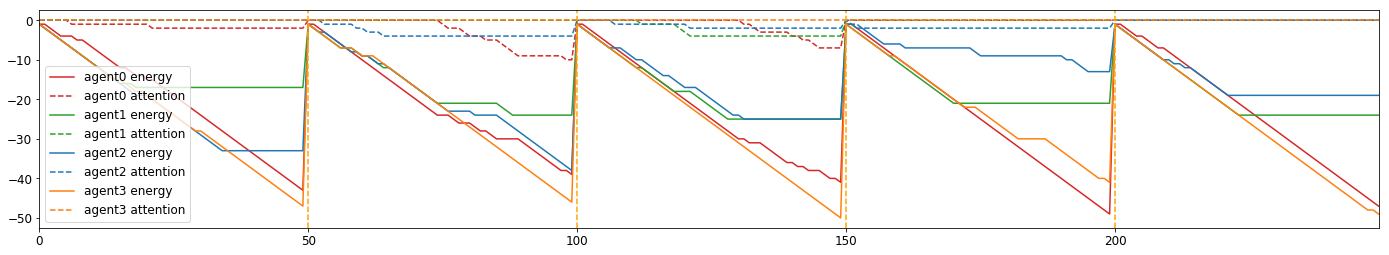

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-6__2018-07-16_16-18-12"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



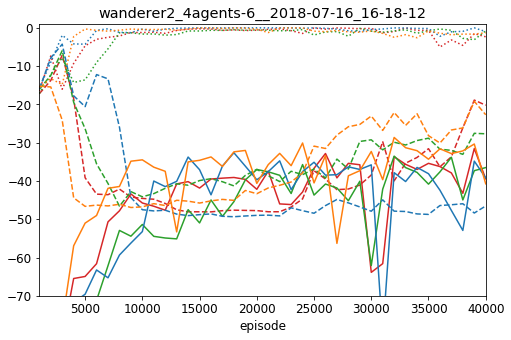

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-6__2018-07-16_16-18-12/videos/video-40000.mp4


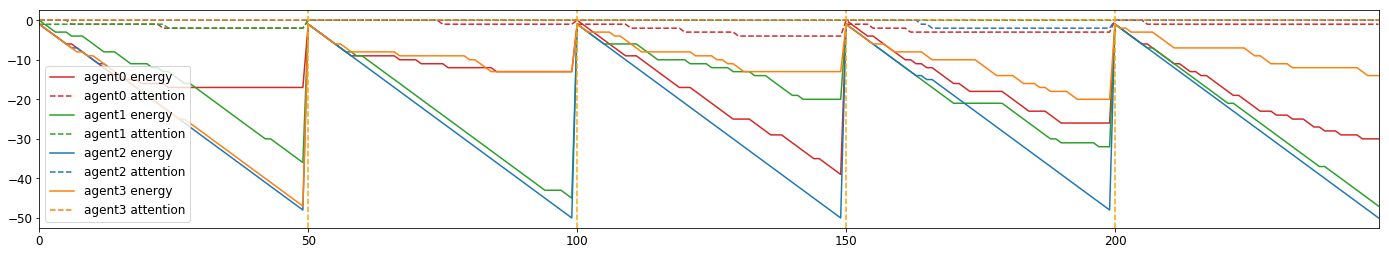

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer2_4agents-6__2018-07-16_16-18-14"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



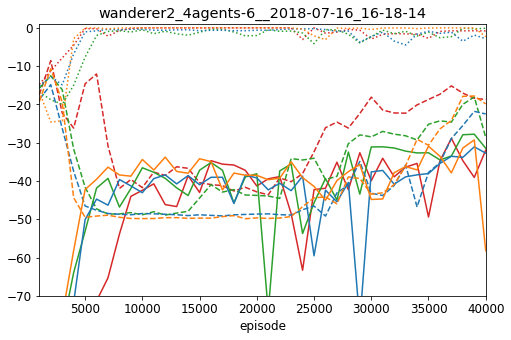

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer2_4agents-6__2018-07-16_16-18-14/videos/video-40000.mp4


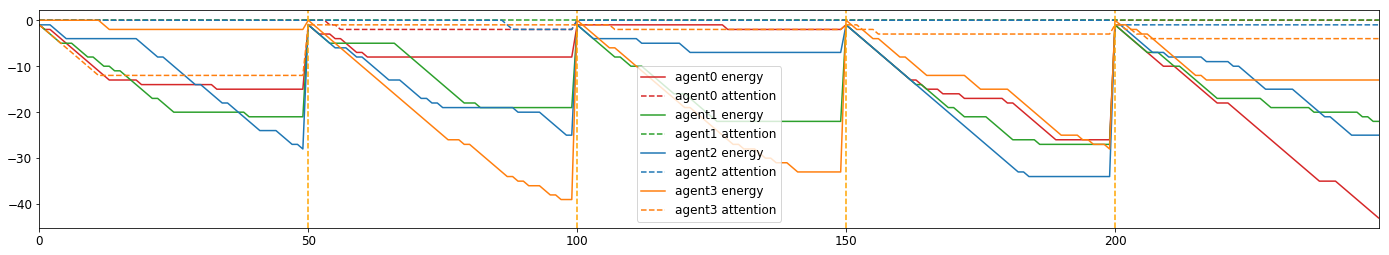

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [14]:
game_name = 'wanderer2_4agents-6'

exp_dir = '../exp_results/exp11_180716/'
each_dirs = get_all_seed_dirs(exp_dir, game_name)
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)